In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_xlsx = pd.read_excel("../data/raw/Telco_customer_churn.xlsx")
data_xlsx.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
data_xlsx['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Churn Label Distribution')

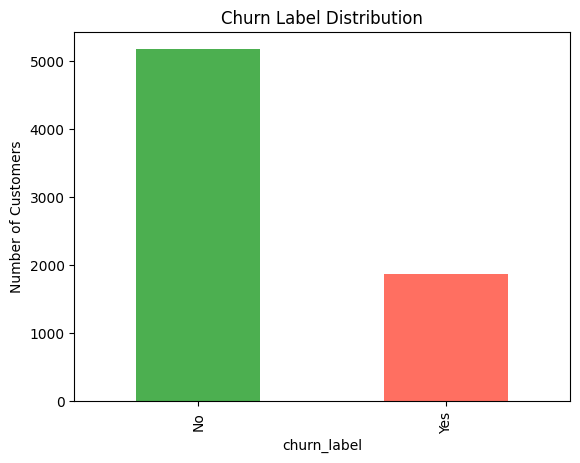

In [45]:

data_xlsx['churn_label'].value_counts().plot(kind='bar', color=['#4CAF50', '#FF6F61'])
plt.ylabel('Number of Customers')
plt.title('Churn Label Distribution')

In [5]:
data_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
data_xlsx.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [7]:
numericals_cols = data_xlsx.select_dtypes(include=["int64", "float64"]).columns
categoricals_cols = data_xlsx.select_dtypes(include=["object"]).columns

numericals_cols, categoricals_cols

(Index(['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
        'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV'],
       dtype='object'),
 Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender',
        'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
        'Multiple Lines', 'Internet Service', 'Online Security',
        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
        'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
        'Total Charges', 'Churn Label', 'Churn Reason'],
       dtype='object'))

In [8]:
data_xlsx.duplicated().sum() # Permet la vérification des doublons exacts


np.int64(0)

In [9]:
data_xlsx.isna().sum() # Permet la vérification des valeurs manquantes

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
data_xlsx.columns = (
    data_xlsx.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [11]:
data_xlsx.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [12]:
target = "churn_label"

num_features = [
    "tenure_months",
    "monthly_charges",
    "total_charges"
]

cat_features = [
    "gender",
    "senior_citizen",
    "partner",
    "dependents",
    "phone_service",
    "multiple_lines",
    "internet_service",
    "online_security",
    "online_backup",
    "device_protection",
    "tech_support",
    "streaming_tv",
    "streaming_movies",
    "contract",
    "paperless_billing",
    "payment_method"
]


Text(0.5, 1.0, 'Contract Type vs Churn Label')

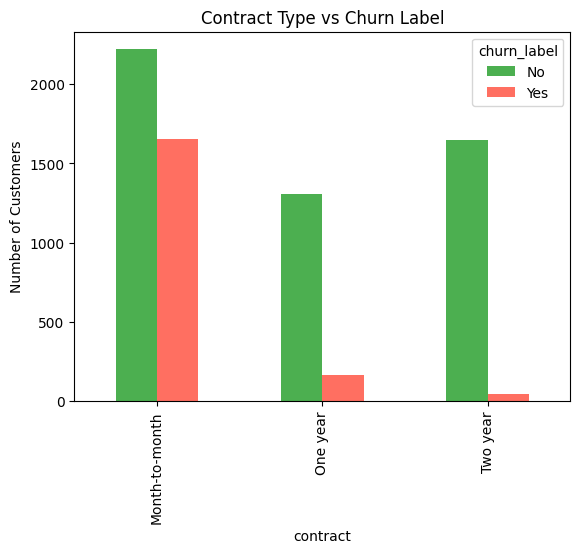

In [46]:
pd.crosstab(data_xlsx["contract"], data_xlsx["churn_label"]).plot(kind="bar", color=["#4CAF50", "#FF6F61"])
plt.ylabel("Number of Customers")
plt.title("Contract Type vs Churn Label")

Les clients en contrat Month-to-Month présentent le taux de churn le plus élevé, tandis que ceux en contrat One-Year ou Two-Year sont plus fidèles. Le type de contrat est donc un facteur clé du churn.

In [47]:
bins = [0, 12, 24, 48, 72]
labels = ["0-12", "13-24", "25-48", "49+"]

data_xlsx["tenure_group"] = pd.cut(data_xlsx["tenure_months"], bins=bins, labels=labels)


Text(0.5, 1.0, 'Tenure Group vs Churn Label')

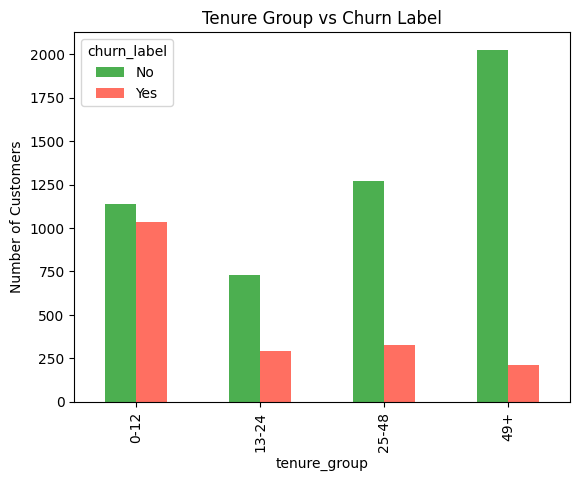

In [48]:
pd.crosstab(data_xlsx["tenure_group"], data_xlsx["churn_label"]).plot(kind="bar", color=["#4CAF50", "#FF6F61"])
plt.ylabel("Number of Customers")
plt.title("Tenure Group vs Churn Label")

Les clients avec 0 à 12 mois d’ancienneté churnent le plus, alors que les clients plus anciens sont beaucoup moins exposés. L’ancienneté est un facteur protecteur contre le churn.

C:\Users\Andréa Afouda\AppData\Local\Temp\ipykernel_2612\2254053365.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn_label", y="monthly_charges", data=data_xlsx, palette="Set2")


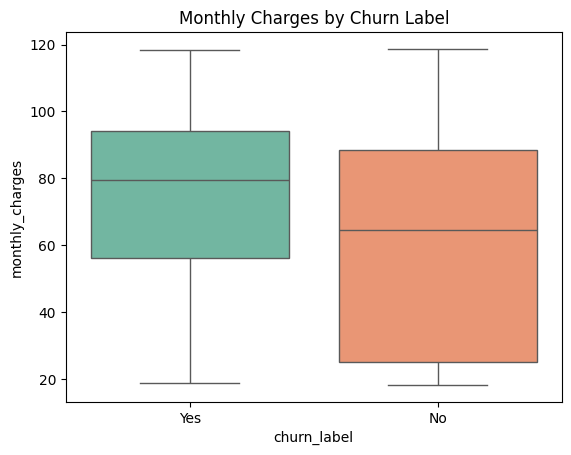

In [27]:
sns.boxplot(x="churn_label", y="monthly_charges", data=data_xlsx, palette="Set2")
plt.title("Monthly Charges by Churn Label")
plt.show()

Les clients avec des charges mensuelles plus élevées churnent légèrement plus, mais la différence n’est pas très marquée. 

In [ ]:
# On voit combien de valeurs non numériques sont présentes dans 'total_charges'
print((data_xlsx['total_charges'].str.strip() == '').sum())

# On les converti en numérique et on force les erreurs à NaN
data_xlsx['total_charges'] = pd.to_numeric(data_xlsx['total_charges'], errors='coerce')

# On  Vérifie les NaN après conversion
print(data_xlsx['total_charges'].isna().sum())


11
11


C:\Users\Andréa Afouda\AppData\Local\Temp\ipykernel_2612\224504289.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn_label", y="total_charges", data=data_xlsx.dropna(subset=['total_charges']), palette="Set1")


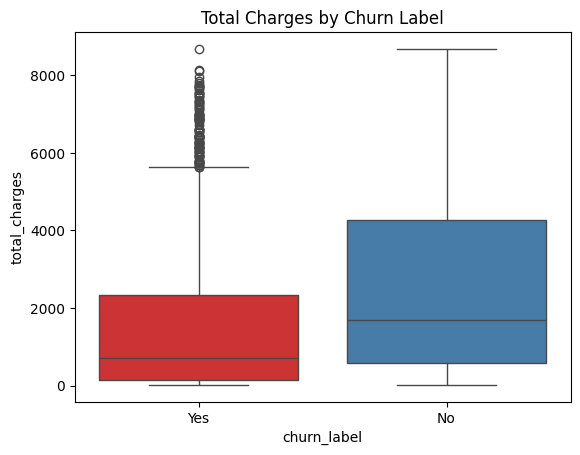

In [31]:
sns.boxplot(x="churn_label", y="total_charges", data=data_xlsx.dropna(subset=['total_charges']), palette="Set1")
plt.title("Total Charges by Churn Label")
plt.show()

Les clients ayant des charges totales faibles (souvent nouveaux clients) churnent le plus, tandis que les clients avec de grosses dépenses totales sont plus fidèles.

Text(0.5, 1.0, 'Tech Support vs Churn Label')

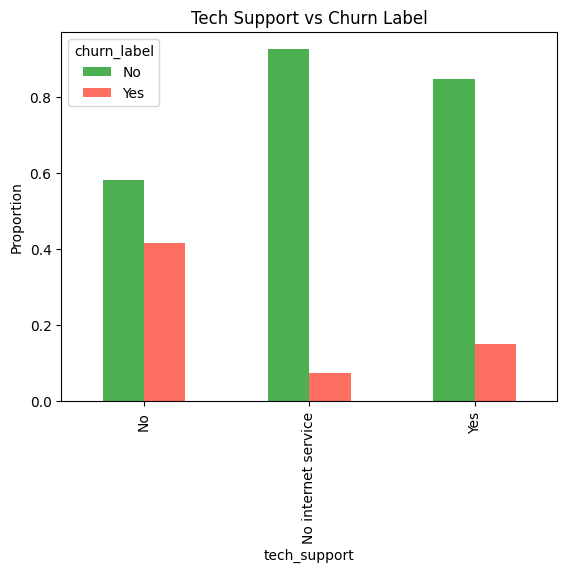

In [37]:
pd.crosstab( data_xlsx["tech_support"], data_xlsx["churn_label"], normalize="index").plot(kind="bar", color=["#4CAF50", "#FF6F61"])
plt.ylabel("Proportion")
plt.title("Tech Support vs Churn Label")

Les clients sans support technique présentent un taux de churn significativement plus élevé que ceux disposant du service. Le support technique est donc un facteur protecteur.

Text(0.5, 1.0, 'Online Security vs Churn Label')

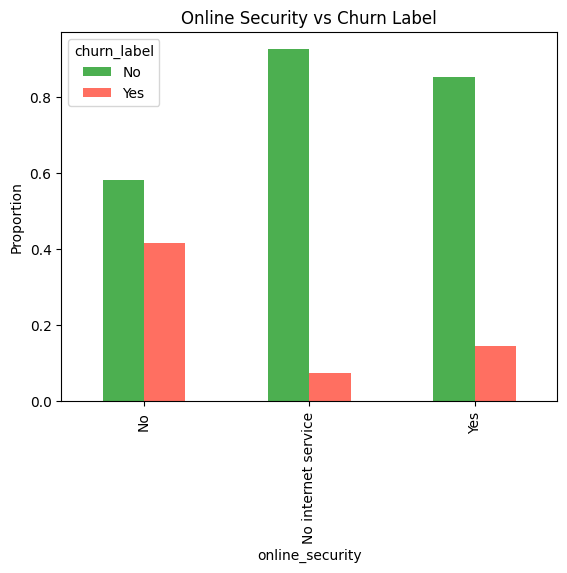

In [49]:
pd.crosstab(
    data_xlsx["online_security"],
    data_xlsx["churn_label"],
    normalize="index"
).plot(kind="bar", color=["#4CAF50", "#FF6F61"])
plt.ylabel("Proportion")
plt.title("Online Security vs Churn Label")

Les clients dépourvus de sécurité en ligne churnent plus souvent que ceux qui ont ce service, confirmant son rôle protecteur.

Text(0.5, 1.0, 'Online backup vs Churn Label')

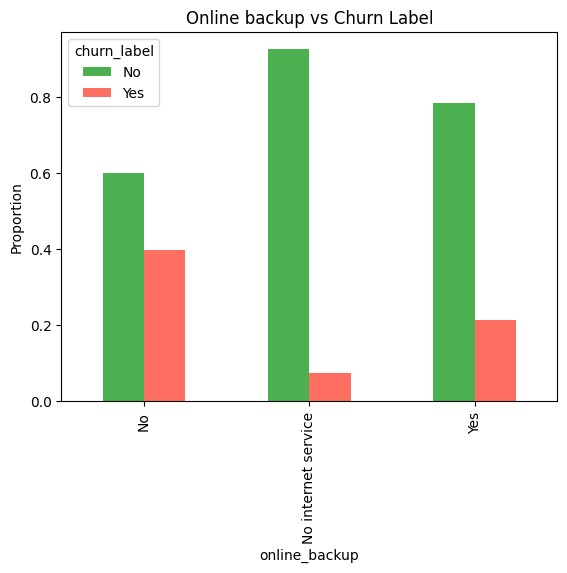

In [50]:
pd.crosstab(
    data_xlsx["online_backup"],
    data_xlsx["churn_label"],
    normalize="index"
).plot(kind="bar", color=["#4CAF50", "#FF6F61"])
plt.ylabel("Proportion")
plt.title("Online backup vs Churn Label")

Les clients sans sauvegarde en ligne ont un taux de churn plus élevé. Ce service contribue à fidéliser les clients.

Text(0.5, 1.0, 'Device protection vs Churn Label')

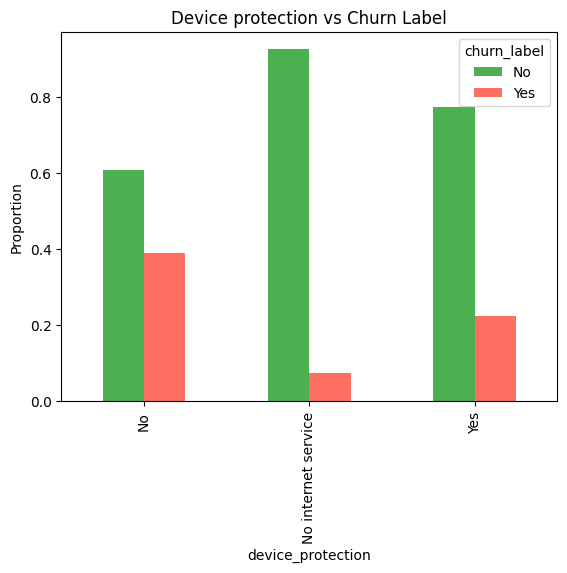

In [51]:
pd.crosstab(
    data_xlsx["device_protection"],
    data_xlsx["churn_label"],
    normalize="index"
).plot(kind="bar", color=["#4CAF50", "#FF6F61"])
plt.ylabel("Proportion")
plt.title("Device protection vs Churn Label")

Les clients sans protection de leurs appareils churnent davantage. La protection des dispositifs est un facteur anti-churn.

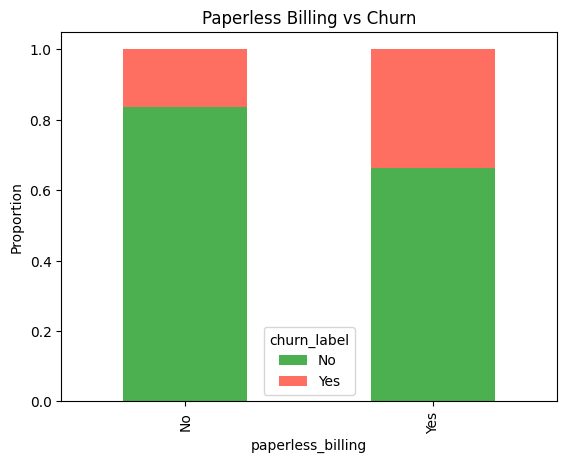

In [52]:
pd.crosstab(data_xlsx['paperless_billing'], data_xlsx['churn_label'], normalize='index').plot(kind='bar', stacked=True, color=["#4CAF50", "#FF6F61"])
plt.ylabel("Proportion")
plt.title("Paperless Billing vs Churn")
plt.show()


Les clients en facturation sans papier présentent un taux de churn plus élevé que ceux en facturation papier, ce qui indique que le papier est un facteur indirect de fidélité.

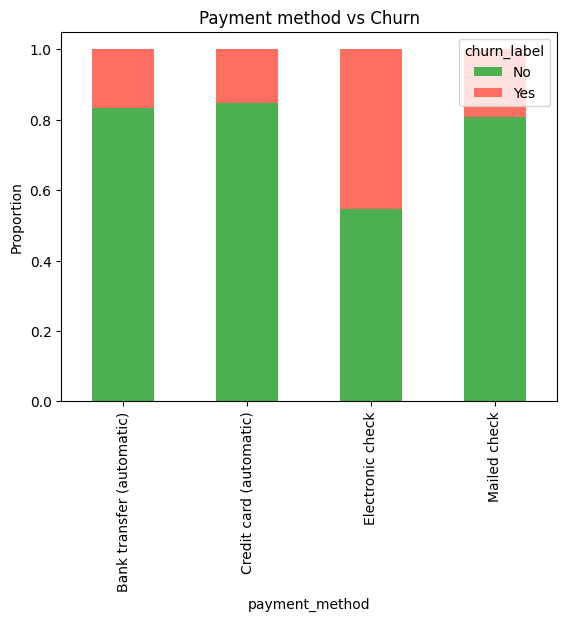

In [53]:
pd.crosstab(data_xlsx['payment_method'], data_xlsx['churn_label'], normalize='index').plot(kind='bar', stacked=True, color=["#4CAF50", "#FF6F61"])
plt.ylabel("Proportion")
plt.title("Payment method vs Churn")
plt.show()


Les clients utilisant Electronic Check churnent le plus, tandis que ceux en transfert bancaire automatique ou carte de crédit automatique sont plus stables.